In [2]:
import pickle

# Path to the pickle file
file_path = "coursera_sta.pickle"

# Open the pickle file

with open(file_path, 'rb') as file:
    data = pickle.load(file)
print("File loaded successfully!")
print("Type of the loaded data:", type(data))
# You can now explore the contents of 'data'
print("Contents:", data)

File loaded successfully!
Type of the loaded data: <class 'dict'>
Contents: {'stim': array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
         24.11132812,   50.25390625]), 'rho': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)}


(array([2.0000e+00, 7.0000e+00, 1.4000e+01, 1.8000e+01, 4.7000e+01,
        6.7000e+01, 1.4100e+02, 2.1600e+02, 2.6800e+02, 4.2700e+02,
        5.7700e+02, 7.4800e+02, 8.4000e+02, 1.0840e+03, 1.2990e+03,
        1.5280e+03, 1.7900e+03, 2.1010e+03, 2.4630e+03, 2.8100e+03,
        3.0770e+03, 3.5510e+03, 4.0190e+03, 4.2370e+03, 4.6620e+03,
        5.2240e+03, 5.5570e+03, 6.1610e+03, 6.8080e+03, 7.3750e+03,
        7.8820e+03, 8.2520e+03, 8.7110e+03, 9.3660e+03, 9.4760e+03,
        1.0172e+04, 1.0556e+04, 1.0962e+04, 1.1594e+04, 1.1499e+04,
        1.2111e+04, 1.2239e+04, 1.2815e+04, 1.2719e+04, 1.3211e+04,
        1.3312e+04, 1.3669e+04, 1.3486e+04, 1.3638e+04, 1.3700e+04,
        1.3688e+04, 1.3835e+04, 1.3529e+04, 1.3494e+04, 1.3489e+04,
        1.3191e+04, 1.3132e+04, 1.2868e+04, 1.2354e+04, 1.2246e+04,
        1.1883e+04, 1.1468e+04, 1.1273e+04, 1.0760e+04, 1.0284e+04,
        1.0015e+04, 9.5900e+03, 9.1240e+03, 8.6390e+03, 7.9430e+03,
        7.5480e+03, 7.0990e+03, 6.3320e+03, 5.86

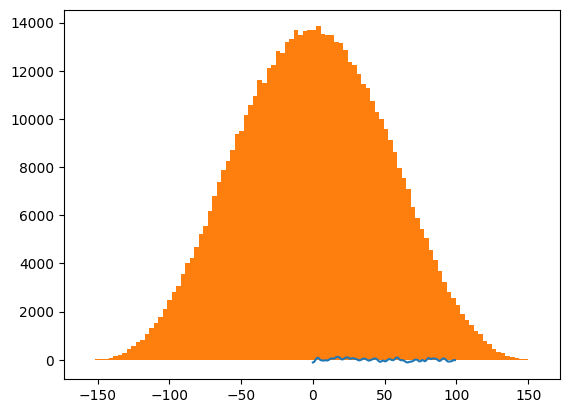

In [5]:
import matplotlib.pyplot as plt

plt.plot(data['stim'][:100])
plt.hist(data['stim'], bins=100)

In [8]:
import numpy as np
rho=data['rho']
stim=data['stim']

np.mean(rho*stim)

-0.0014521077473958334

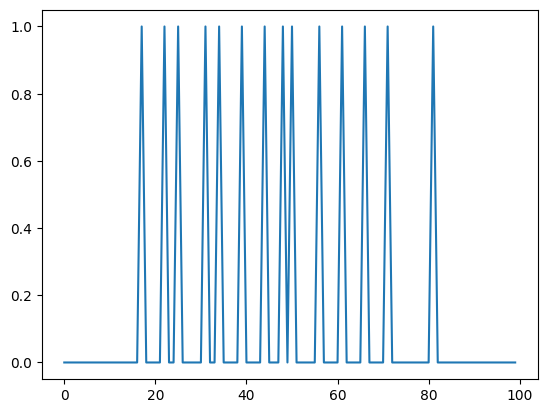

In [9]:
plt.plot(rho[:100])

In [10]:
import numpy as np

rho = data['rho']  # Binary array indicating spike times (e.g., 0 or 1)
stim = data['stim']  # Stimulus array

# Length of the stimulus window preceding each spike
window_size = 15

# Ensure rho and stim are compatible
if len(rho) != len(stim):
    raise ValueError("rho and stim must have the same length.")

# Initialize a list to collect all stimulus windows
stim_windows = []

# Loop through each time point to find spikes
for t in range(window_size, len(rho)):  # Start at window_size to avoid out-of-bounds
    if rho[t] == 1:  # Spike occurred at time t
        stim_window = stim[t - window_size:t]  # Extract the preceding 15 time points
        stim_windows.append(stim_window)

# Compute the spike-triggered average
if stim_windows:  # Ensure there are spikes
    sta = np.mean(stim_windows, axis=0)  # Average over all collected windows
else:
    sta = np.zeros(window_size)  # Default to zeros if no spikes occurred

print("Spike-triggered average:", sta)


Spike-triggered average: [29.44345858 29.46401247 27.27093715 22.44189452 15.98234889  9.41484929
  4.44116224  1.80689578  0.80941601  0.47724876  0.28434464  0.18585387
  0.24536267  0.1293534  -0.0605789 ]


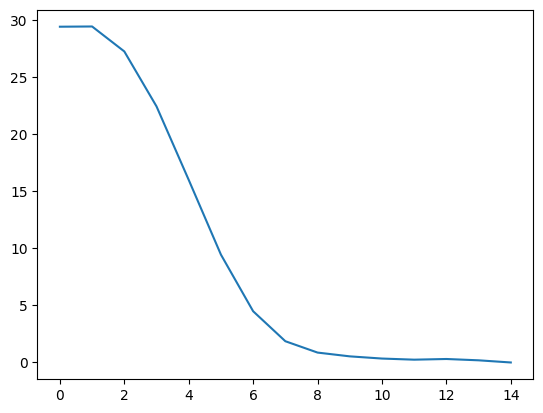

In [11]:
plt.plot(sta)